# generate_data

In [1]:
import os
os.chdir("..")

In [2]:
from config import code_path, results_path, figures_path, data_path

In [3]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
os.chdir(code_path)
from classes import Problems as P

## Generate the graphs
Throughout the project we will use the following graphs:

- $\small{\texttt{graph}\_0}\dots,\small{\texttt{graph}\_3}$ are **complete graphs** with $n=4,6,8,10$ nodes;
- $\small{\texttt{graph}\_4}\dots,\small{\texttt{graph}\_7}$ are **Erdos-Renyi graphs** with $n=4,6,8,10$ nodes and $p=0.5$;
- $\small{\texttt{graph}\_8}\dots,\small{\texttt{graph}\_11}$ are **Complete (full) rary trees** with $n=4,6,8,10$ nodes and branching factor of 2;
- $\small{\texttt{graph}\_12}\dots,\small{\texttt{graph}\_15}$ are **random regular graphs** with $n=4,6,8,10$ nodes with degree of 3.
- $\small{\texttt{graph}\_16}\dots,\small{\texttt{graph}\_17}$ are **full binary trees** with geight $h=1,2$ and $n=2^h-1$ nodes.

In [ ]:
# GENERATE THE DATASET (RUN ONLY ONCE)

for i in range(18):
    g = P.Problems(verbose=True)
    path = graphs_path + "graph_"+str(i)+".nx"
    with open(path, "wb") as fp:   
        pickle.dump(g, fp) 

## Check

Once the graphs have been obtained we can check the result and save the plot of each graph in the figure's directory.

In [5]:
# LOAD THE GRAPHS

graphs = []
for i in range(18):
    graph_path =  "/graph_"+str(i)+".nx"
    with open(data_path + graph_path, 'rb') as f:
        g = pickle.load(f)
    graphs.append(g)

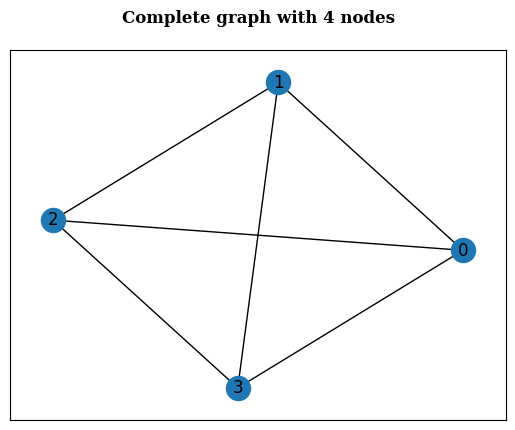

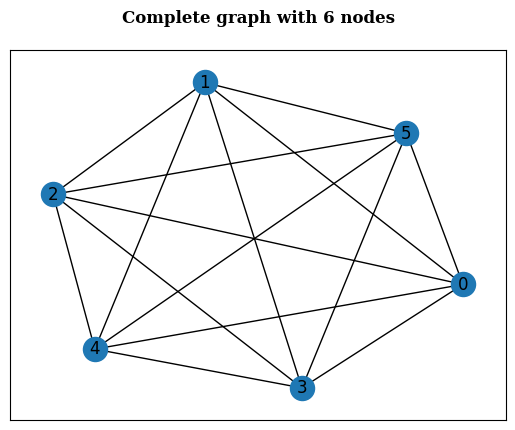

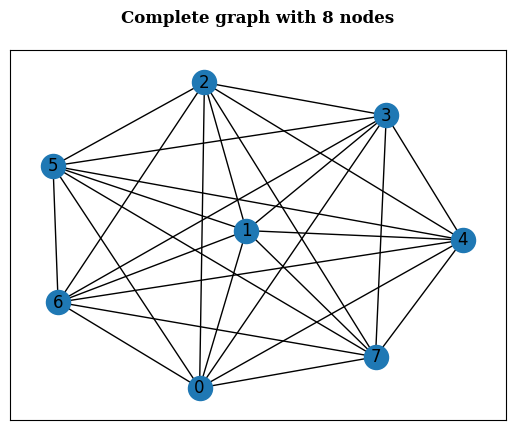

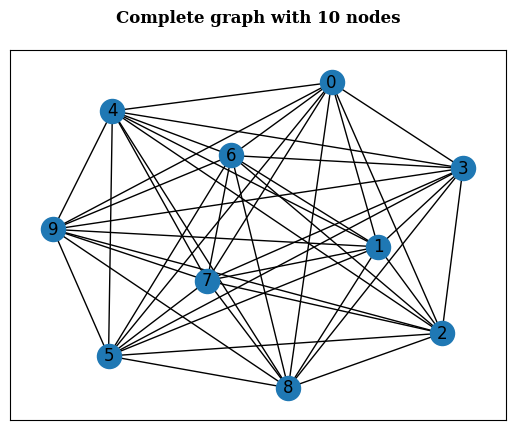

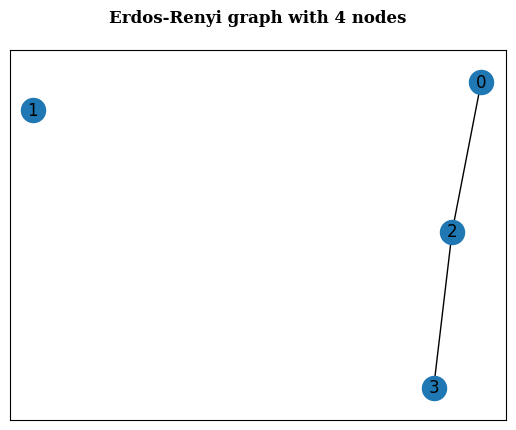

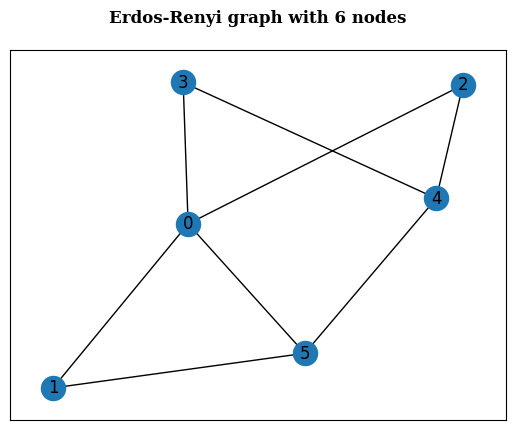

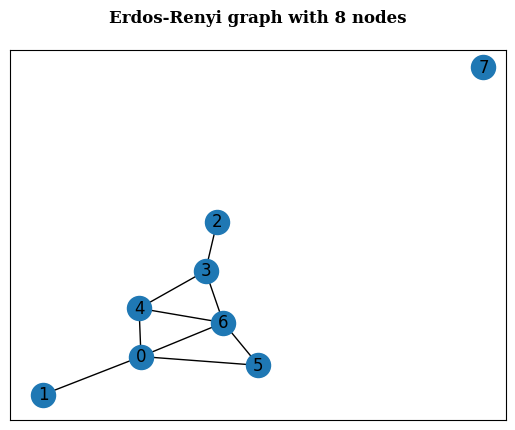

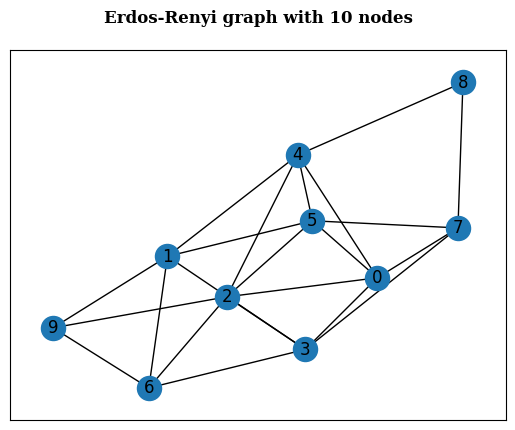

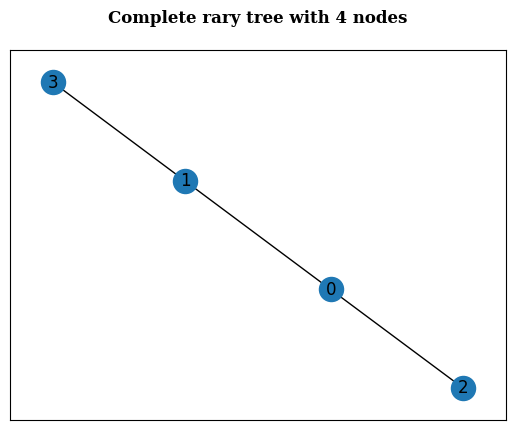

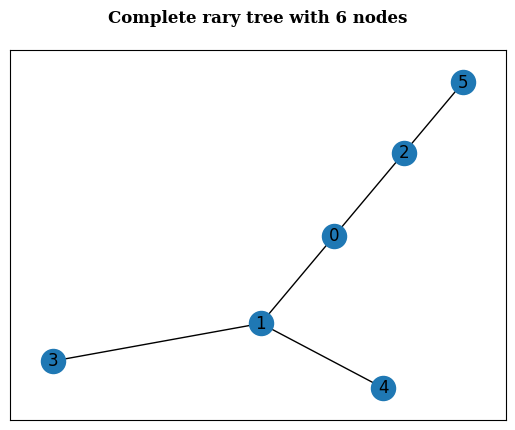

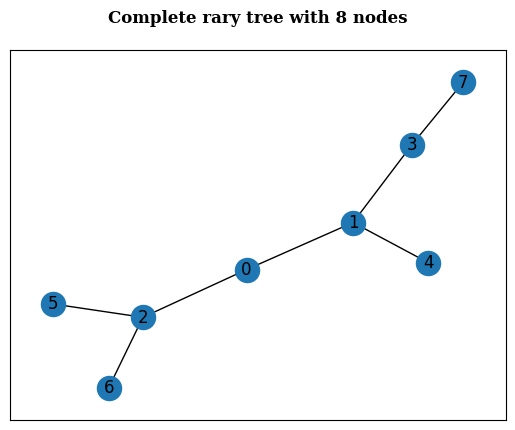

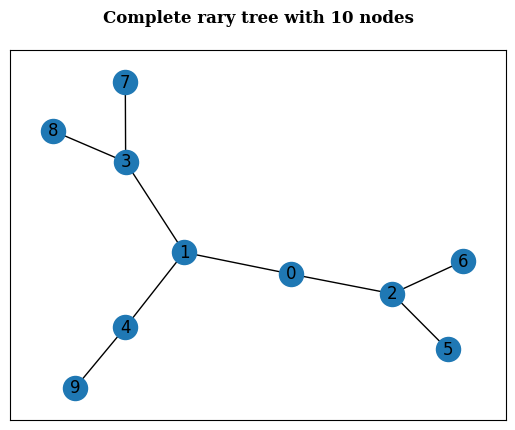

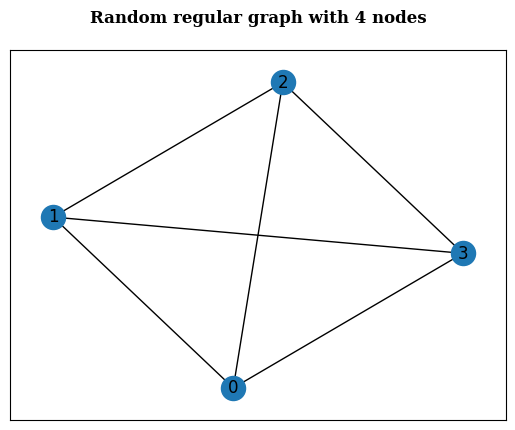

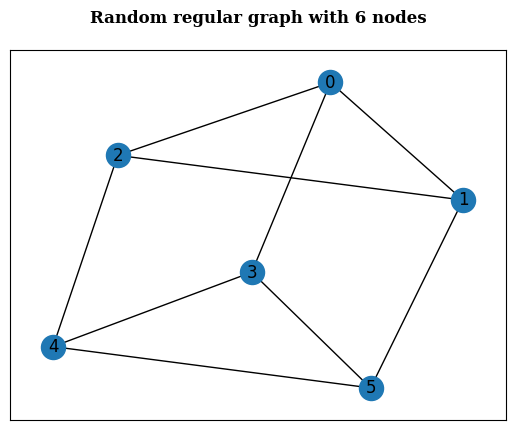

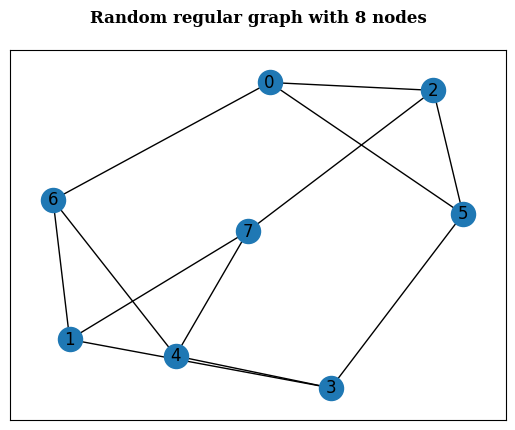

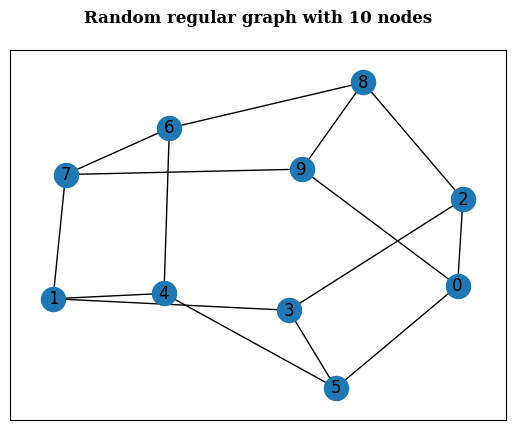

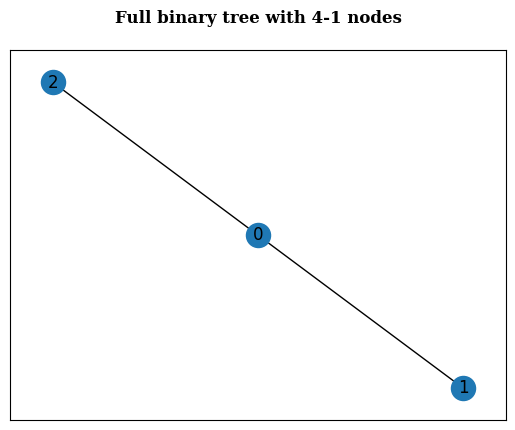

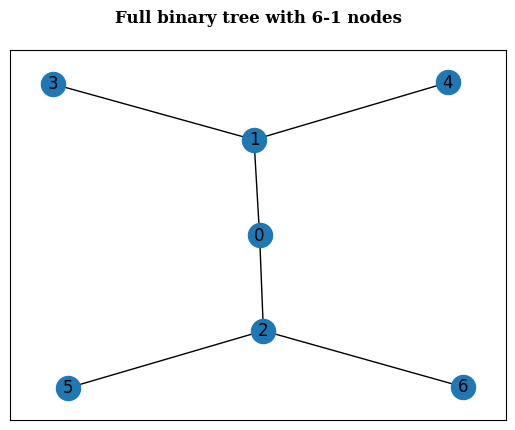

In [8]:
# GET AND SAVE THE GRAPHS' PLOTS

for i in range(18):
    plt.figure(i)
    #number of nodes (0->4, 1->6, 2->8, 3->10,...)
    j = str(i%4+4+(i%4))
    if i in range(4):
        name = "complete_graph"
        title = "Complete graph"
    elif i in range(4,8):
        name = "Erdos-Renyi_graph"
        title = "Erdos-Renyi graph"
    elif i in range(8,12):
        name = "complete_rary_tree"
        title = "Complete rary tree"
    elif i in range(12,16):
        name = "random_regular_graph"
        title = "Random regular graph"
    else:
        name = "full_binary_tree"
        title =  "Full binary tree"
    #plot the graphs
    plt.figure(i)
    title_font = {'family': 'serif', 'weight': 'bold', 'size': 12}
    if name != "full_binary_tree":
        plt.title(title + " with " + j + " nodes", fontdict=title_font, pad=20)
        graphs[i].get_draw()
        plt.savefig(figures_path + "/" + name + "_with_" + j + "_nodes")
    else:
        plt.title(title + " with " + j + str(-1) + " nodes", fontdict=title_font, pad=20)
        graphs[i].get_draw()
        plt.savefig(figures_path + "/" + name + "_with_" + j + str(-1) + "_nodes")
    
plt.show()